In [1]:
# Import the needed dependencies - Pandas, matplotlib.pyplot, NumPy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations and pack as pairs using the zip() function
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Unpack the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import citypy from citypy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

589

In [13]:
# 6.2.3 Import Requests library
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bed12b228c2ad23e4950ef491cbf1fb1


In [14]:
# 6.2.5 Import the datetime module from the datetime library
from datetime import datetime

In [9]:
# 6.2.6 Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval.   ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL, record, and set numbers and the city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1

    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval.   
----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | srednekolymsk
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | sao jose dos pinhais
Processing Record 11 of Set 1 | tala
Processing Record 12 of Set 1 | gorgan
Processing Record 13 of Set 1 | port macquarie
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | klaksvik
Processing Record 17 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 18 of Set 1 | batagay-alyta
Processing Record 19 of Set 1 | vila
Processing Record 20 of Set 1 | caimito
Processing Record 21 of Set 1 | apac
Processing Reco

Processing Record 38 of Set 4 | xirokambion
City not found. Skipping...
Processing Record 39 of Set 4 | codrington
Processing Record 40 of Set 4 | marcona
City not found. Skipping...
Processing Record 41 of Set 4 | sayat
Processing Record 42 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | jijiang
Processing Record 45 of Set 4 | poronaysk
Processing Record 46 of Set 4 | aswan
Processing Record 47 of Set 4 | gurgan
City not found. Skipping...
Processing Record 48 of Set 4 | chara
Processing Record 49 of Set 4 | victoria
Processing Record 50 of Set 4 | flinders
Processing Record 1 of Set 5 | praia da vitoria
Processing Record 2 of Set 5 | dalby
Processing Record 3 of Set 5 | tuktoyaktuk
Processing Record 4 of Set 5 | visby
Processing Record 5 of Set 5 | hambantota
Processing Record 6 of Set 5 | aloleng
Processing Record 7 of Set 5 | lolua
City not found. Skipping...
Processing Record 8 of Set 5 | souillac
Processing

Processing Record 27 of Set 8 | aljezur
Processing Record 28 of Set 8 | canmore
Processing Record 29 of Set 8 | tsabong
Processing Record 30 of Set 8 | mumford
Processing Record 31 of Set 8 | barao de melgaco
Processing Record 32 of Set 8 | riyadh
Processing Record 33 of Set 8 | diego de almagro
Processing Record 34 of Set 8 | ust-omchug
Processing Record 35 of Set 8 | kayes
Processing Record 36 of Set 8 | te anau
Processing Record 37 of Set 8 | barrow
Processing Record 38 of Set 8 | namtsy
Processing Record 39 of Set 8 | lipari
Processing Record 40 of Set 8 | mareeba
Processing Record 41 of Set 8 | tamworth
Processing Record 42 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 43 of Set 8 | bereznik
Processing Record 44 of Set 8 | putina
Processing Record 45 of Set 8 | salalah
Processing Record 46 of Set 8 | egvekinot
Processing Record 47 of Set 8 | sutton
Processing Record 48 of Set 8 | scarborough
Processing Record 49 of Set 8 | moranbah
Processing Record 50 of Set 

Processing Record 17 of Set 12 | vadso
Processing Record 18 of Set 12 | raudeberg
Processing Record 19 of Set 12 | placido de castro
Processing Record 20 of Set 12 | saint-francois
Processing Record 21 of Set 12 | baykit
Processing Record 22 of Set 12 | axim
Processing Record 23 of Set 12 | mergui
City not found. Skipping...
Processing Record 24 of Set 12 | nankana sahib
Processing Record 25 of Set 12 | benghazi
Processing Record 26 of Set 12 | kieta
Processing Record 27 of Set 12 | south sioux city
Processing Record 28 of Set 12 | chernyshkovskiy
Processing Record 29 of Set 12 | iquique
Processing Record 30 of Set 12 | calabozo
Processing Record 31 of Set 12 | takayama
Processing Record 32 of Set 12 | tamandare
Processing Record 33 of Set 12 | saryozek
Processing Record 34 of Set 12 | tillabery
City not found. Skipping...
Processing Record 35 of Set 12 | isangel
Processing Record 36 of Set 12 | artyk
City not found. Skipping...
Processing Record 37 of Set 12 | aykhal
Processing Record

In [1]:
# 6.2.7 Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'pd' is not defined

In [11]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Display the new columns order
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2021-08-02 21:21:00,-22.9661,-42.0278,73.36,77,0,11.50
1,Puerto Ayora,EC,2021-08-02 21:21:00,-0.7393,-90.3518,78.76,82,72,11.95
2,Chokurdakh,RU,2021-08-02 21:19:21,70.6333,147.9167,45.34,57,51,7.81
3,Albany,US,2021-08-02 21:20:45,42.6001,-73.9662,79.18,49,16,3.00
4,Hobart,AU,2021-08-02 21:17:15,-42.8794,147.3294,43.27,88,75,6.91
...,...,...,...,...,...,...,...,...,...
534,Saryozek,KZ,2021-08-02 21:23:06,44.3583,77.9753,66.81,26,86,1.50
535,Isangel,VU,2021-08-02 21:21:07,-19.5500,169.2667,66.31,88,20,0.00
536,Aykhal,RU,2021-08-02 21:22:58,66.0000,111.5000,63.14,58,100,8.88
537,Araouane,ML,2021-08-02 21:23:06,18.9048,-3.5265,98.46,28,20,7.65


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# 6.3.1 Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

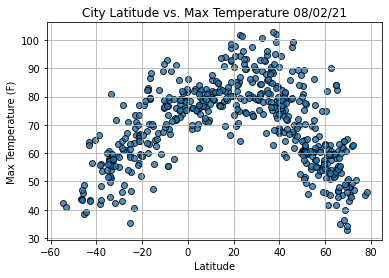

In [17]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

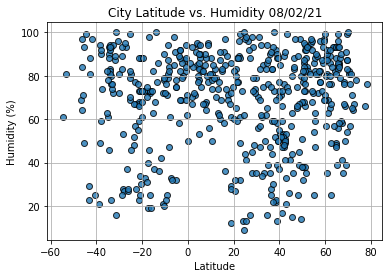

In [18]:
# 6.3.2 Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

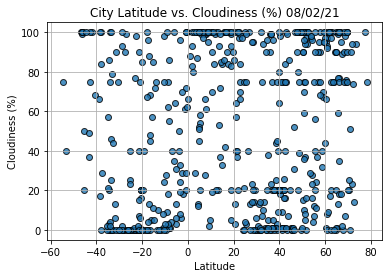

In [21]:
# 6.3.3 Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

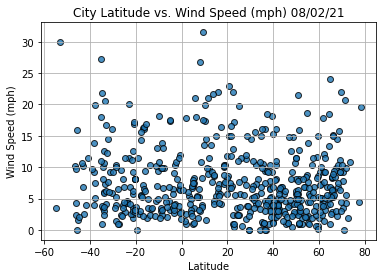

In [22]:
# 6.3.4 Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [23]:
# 6.4.2 Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create a new DataFrame from the current DataFrame using the loc method
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2021-08-02 21:20:25
Lat                         -46.6
Lng                      168.3333
Max Temp                    43.81
Humidity                       69
Cloudiness                    100
Wind Speed                  10.16
Name: 13, dtype: object

In [27]:
# Create DataFrames from the Northern Hemisphere and Southern Hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

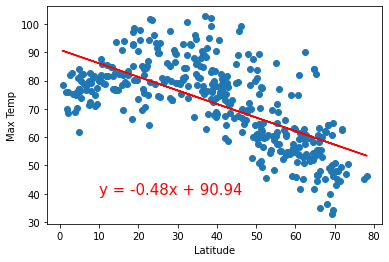

In [31]:
# Perform linear regression for maximum temperature on the Northern Hemisphere DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", "Max Temp",(10,40))

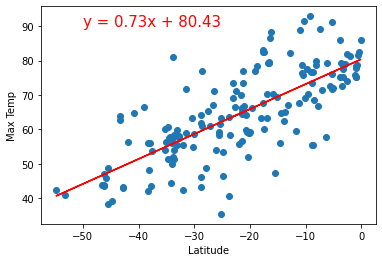

In [32]:
# Perform linear regression for maximum temperature on the Southern Hemisphere DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature", "Max Temp",(-50,90))

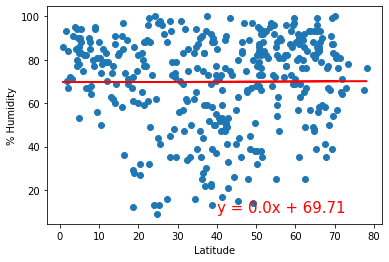

In [33]:
# 6.4.3 Perform linear regression for humidity in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

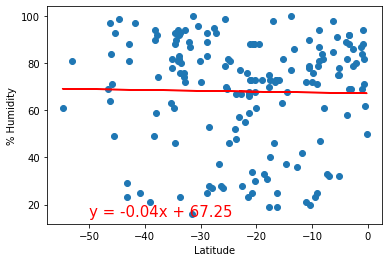

In [36]:
# Perform linear regression for humidity in the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,15))

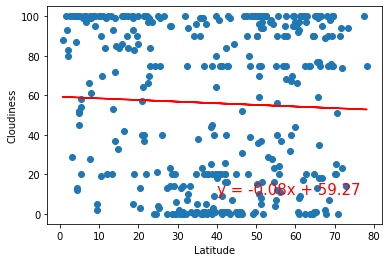

In [37]:
# SKILL DRILL Perform linear regression for cloudiness in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 'Cloudiness',(40,10))

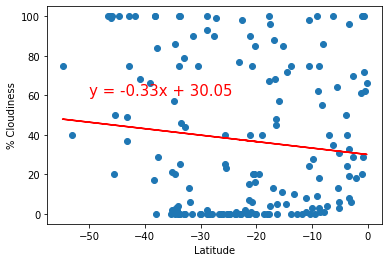

In [39]:
# Perform linear regression for cloudiness in the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

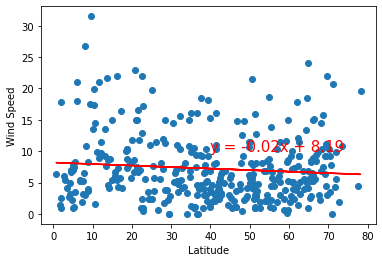

In [40]:
# 6.4.5 Perform linear regression for wind speed in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,10))